pdf -> Probabilty Density Function   
cdf -> Cumulative Distribution function

cdf = integration(pdf)  
pdf = differentiation(cdf)

Differentiation - It is the process of finding gradient that is the slope of the curve which is the smallest change that can happen in y with respect to x

Integration -  Area under the curve 

In [2]:
import numpy as np   #array handling
import pandas as pd   #Tables and rows
import matplotlib.pyplot as plt  #visualization
import seaborn as sns  #visualization
import warnings  #ignore warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [4]:
data = pd.read_csv('Iris.csv')

In [5]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.shape

(150, 6)

In [7]:
data.rename(columns={'SepalLengthCm':'SL', 'SepalWidthCm': 'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'}, inplace = True)

In [8]:
iris_setosa = data[data['Species']=='Iris-setosa']
iris_versicolor = data[data['Species']=='Iris-versicolor']
iris_virginica = data[data['Species']=='Iris-virginica']

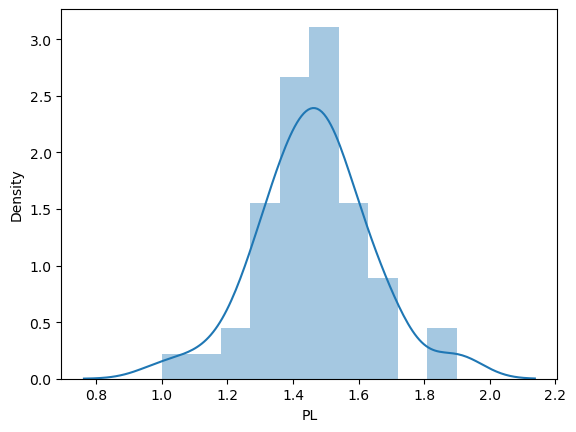

In [9]:
sns.distplot(iris_setosa['PL'])
plt.show()

In [8]:
data.dtypes

Id           int64
SL         float64
SW         float64
PL         float64
PW         float64
Species     object
dtype: object

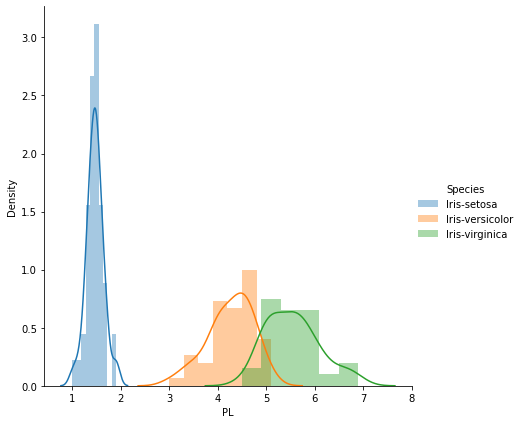

In [21]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'PL').add_legend()
plt.show()

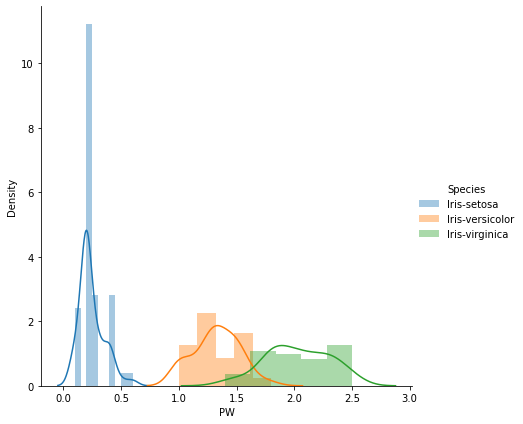

In [22]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'PW').add_legend()
plt.show()

In [ ]:
`
pdf(1.4) = 3/10

pdf = (frequency of particular observation/total observation)

Q - write a code to create a distinction between all the three flowers

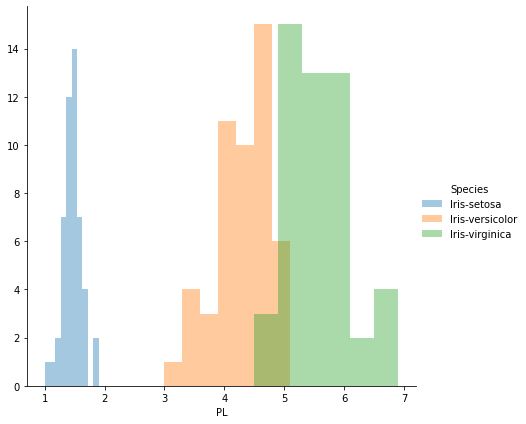

In [24]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'PL', kde = False).add_legend()
plt.show()

#kde - kernel density estimation

In [26]:
#Now it will only print histogram and not the pdf

#Now if you write a code for this it will be little confusing because

if PL<2 --> iris-setosa   
elif PL>2 and less than 4.5 something ---> iris-versicolor   
and so on is iris virginica

Here in this confusion, we can get the help of pdf which will tell almost where we can take versicolor and where virginica

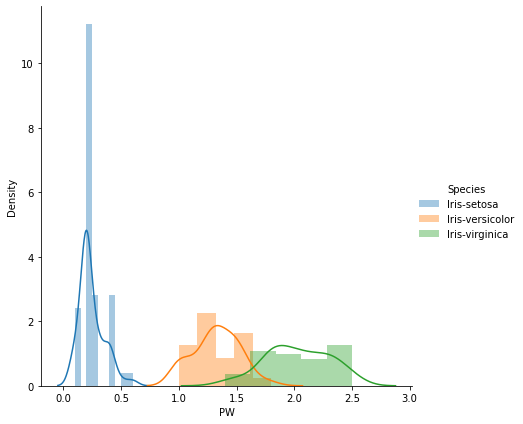

In [27]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'PW').add_legend()
plt.show()

So through this clear distinction between species can be done by pdf and PL feture is the best discriminator among PL and PW to get the clear idea

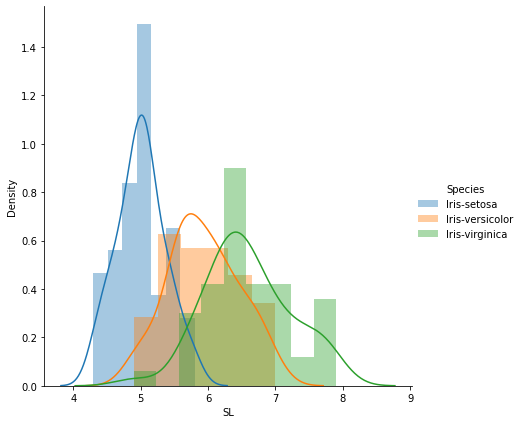

In [28]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'SL').add_legend()
plt.show()

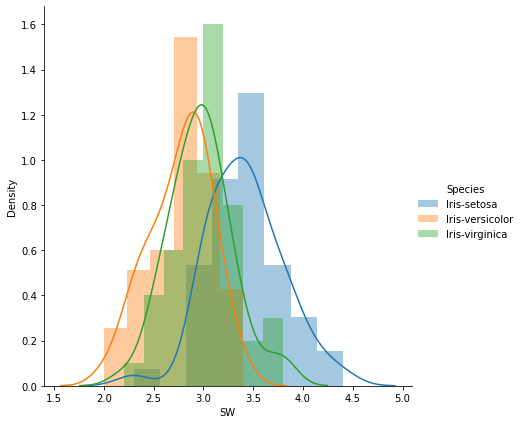

In [14]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'SW').add_legend()
plt.show()

# CDF

![](pdfandcdf.png)

## How to calculate pdf and cdf

In [10]:
np.histogram(iris_setosa['PL'], bins=10)

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

In [11]:
counts, bin_edges = np.histogram(iris_setosa['PL'], bins=10)

#bins_edges -> width of the bina and where each bin will come
#counts -> between two bins what is the frequency of the observations

In [12]:
counts

array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64)

In [13]:
bin_edges

array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])

In [14]:
pdf = counts/sum(counts)   #probability

cdf = np.cumsum(pdf)  #cumulative sum of pdf will be cdf

print(pdf)
print(cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


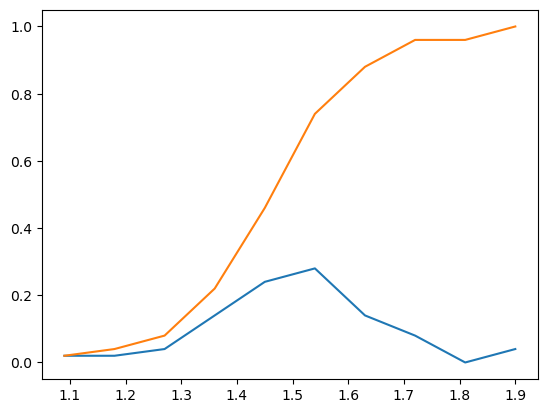

In [15]:
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)   #[1:] so that we can match it with counts as counts is 10 
#plt.show()

## How cdf is helping for analysis

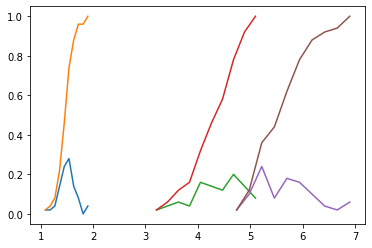

In [20]:
counts, bin_edges = np.histogram(iris_setosa['PL'], bins=10)

pdf = counts/sum(counts)   
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris_versicolor['PL'], bins=10)

pdf = counts/sum(counts)   
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris_virginica['PL'], bins=10)

pdf = counts/sum(counts)   
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

observations:
    
    100% of the setosa flowers have petal length lying below 2.    
    around 95% at the point P has iris-versicolor and around 10% are virginca
    ie if 3<PL<5 :
        versicolor
    else:
        verginica
    ie we have 95% correction
    
    PL>5 is virginca in this case we will be around 10% wrongbecause of this purple line below
        
    